In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np

# Analysing data

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.shape, test.shape

((891, 12), (418, 11))

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [9]:
def percent_value_counts(df, feature):
    """This function takes in a dataframe and a column and finds the percentage of the value_counts"""
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    ## creating a df with th
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

In [10]:
missing_percentage(train)[missing_percentage(train)['Total'] != 0]    

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


In [11]:
missing_percentage(test)[missing_percentage(test)['Total'] != 0]   

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24


In [12]:
percent_value_counts(train, 'Sex')

,Total,Percent
male,577,64.76
female,314,35.24


In [13]:
pd.concat([percent_value_counts(train[train['Survived'] == 0], 'Sex'), percent_value_counts(train[train['Survived'] == 1], 'Sex')], axis=1, sort=False)

,Total,Percent,Total,Percent
male,468,85.25,109,31.87
female,81,14.75,233,68.13


In [14]:
train['Sex'] = train.Sex.apply(lambda x: 0 if x == 'male' else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == 'male' else 1)

In [15]:
percent_value_counts(train, 'Cabin')

,Total,Percent
NaN,687,77.10
B96 B98,4,0.45
C23 C25 C27,4,0.45
G6,4,0.45
D,3,0.34
...,...,...
E31,1,0.11
A10,1,0.11
D6,1,0.11
E68,1,0.11


In [16]:
percent_value_counts(train, 'Embarked')

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [17]:
train[train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


### Completing / Deleting missing values in datasets

In [19]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)
drop_column = ['PassengerId', 'Cabin', 'Ticket']
train.drop(drop_column, axis=1, inplace=True)
test.drop(drop_column, axis=1, inplace=True)
print(train.isna().sum())
print(test.isna().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [20]:
train.shape, test.shape

((891, 9), (418, 8))

In [41]:
print(train.columns[0])
print('-'*10)
for (i, j) in zip(train.columns[1:], test.columns):
    print(i)
    print(j)
    print('-'*10)

Survived
----------
Pclass
Pclass
----------
Name
Name
----------
Sex
Sex
----------
Age
Age
----------
SibSp
SibSp
----------
Parch
Parch
----------
Fare
Fare
----------
Embarked
Embarked
----------


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [45]:
percent_value_counts(train, 'Embarked')

,Total,Percent
S,646,72.50
C,168,18.86
Q,77,8.64


In [47]:
train['Embarked'] = train.Embarked.apply(lambda x: 1 if x == 'S')
train['Embarked'] = train.Embarked.apply(lambda x: 2 if x == 'C')
train['Embarked'] = train.Embarked.apply(lambda x: 3 if x == 'Q')
test['Embarked'] = test.Embarked.apply(lambda x: 1 if x == 'S')
test['Embarked'] = test.Embarked.apply(lambda x: 2 if x == 'C')
test['Embarked'] = test.Embarked.apply(lambda x: 3 if x == 'Q')

SyntaxError: invalid syntax (<ipython-input-47-8950e4ef8fbf>, line 1)

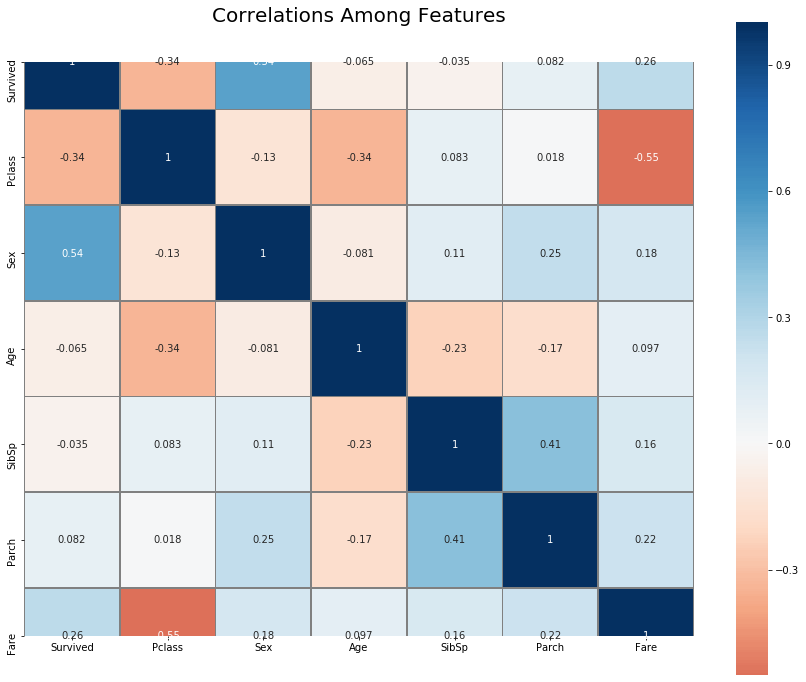

In [42]:
plt.subplots(figsize = (15, 12))
sns.heatmap(train.corr(), 
            annot=True, 
            mask=np.zeros_like(train.corr(), dtype=np.bool),
            cmap = 'RdBu', 
            linewidths=.9, 
            linecolor='gray',
            fmt='.2g',
            center = 0,
            square=True
           
           );
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);